In [1]:
# pip install imbalanced-learn


Modelo: GradientBoosting
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6640
           1       0.97      0.85      0.91      2433

    accuracy                           0.95      9073
   macro avg       0.96      0.92      0.94      9073
weighted avg       0.95      0.95      0.95      9073



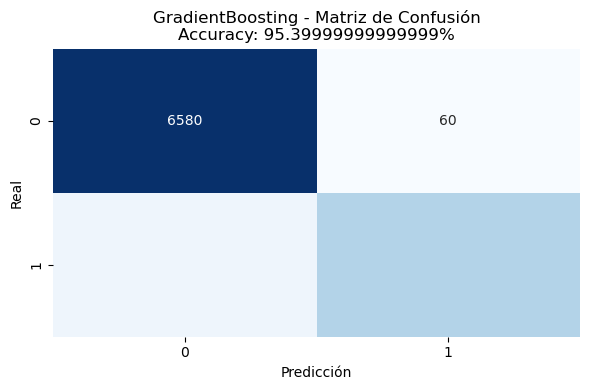


Modelo: RandomForest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6640
           1       0.95      0.95      0.95      2433

    accuracy                           0.97      9073
   macro avg       0.97      0.97      0.97      9073
weighted avg       0.97      0.97      0.97      9073



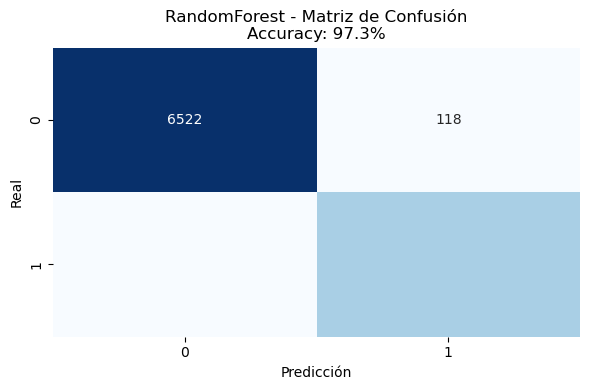


Modelo: LogisticRegression
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6640
           1       0.80      0.73      0.76      2433

    accuracy                           0.88      9073
   macro avg       0.85      0.83      0.84      9073
weighted avg       0.88      0.88      0.88      9073



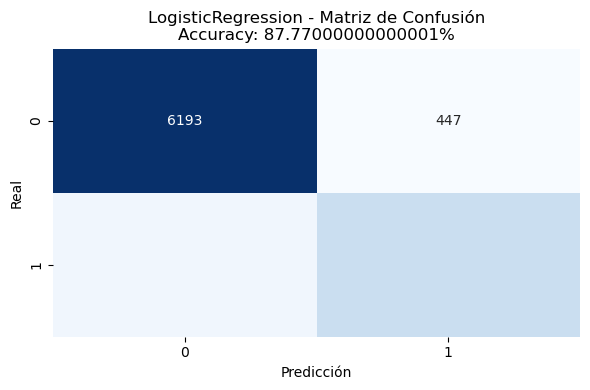


Modelo: SVM
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6640
           1       0.85      0.75      0.80      2433

    accuracy                           0.90      9073
   macro avg       0.88      0.85      0.87      9073
weighted avg       0.90      0.90      0.90      9073



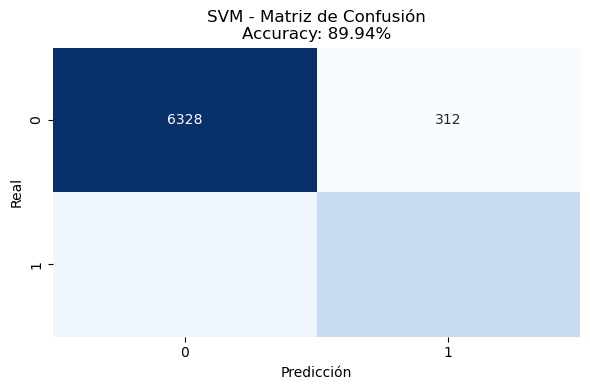


Modelo: KNeighbors
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6640
           1       0.97      0.95      0.96      2433

    accuracy                           0.98      9073
   macro avg       0.98      0.97      0.97      9073
weighted avg       0.98      0.98      0.98      9073



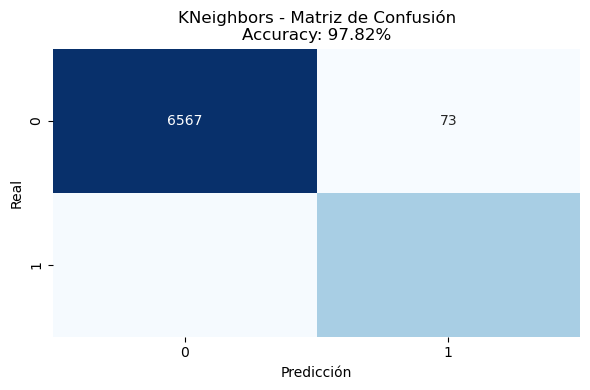


Modelo: DecisionTree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6640
           1       0.95      0.95      0.95      2433

    accuracy                           0.97      9073
   macro avg       0.96      0.96      0.96      9073
weighted avg       0.97      0.97      0.97      9073



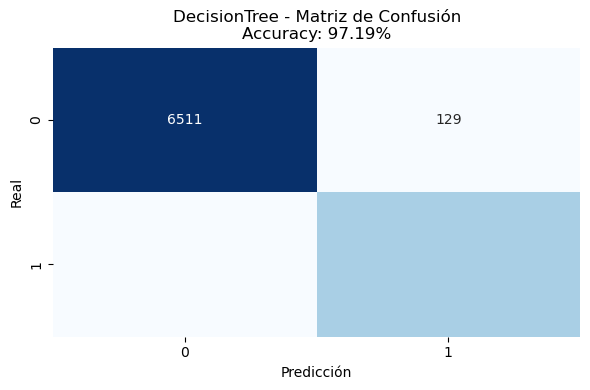


Modelo: NeuralNetwork
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6640
           1       0.93      0.78      0.85      2433

    accuracy                           0.93      9073
   macro avg       0.93      0.88      0.90      9073
weighted avg       0.93      0.93      0.92      9073



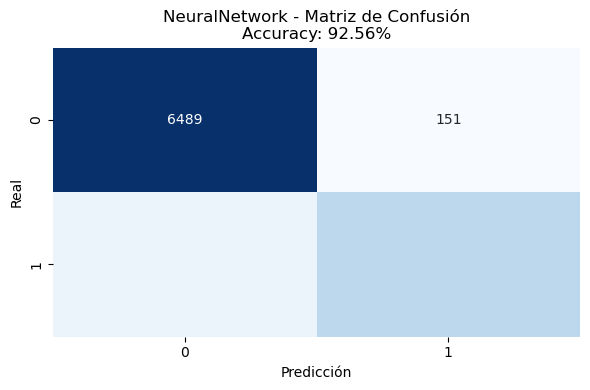


MEJOR MODELO
Nombre: KNeighbors
Accuracy: 97.82%
El mejor modelo ha sido guardado como 'mejor_modelo.pkl'


In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Importar joblib para guardar el modelo

data = pd.read_csv("datos_red_limpios.csv")

features = [col for col in data.columns if col not in ["congestion", "latencia"]]

X = data[features].dropna()
y = data.loc[X.index, "congestion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

modelos = {
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="rbf", probability=True),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
}

mejor_accuracy = 0
mejor_modelo = None
mejor_nombre = ""

for nombre, modelo in modelos.items():
    model = Pipeline([("scaler", RobustScaler()), ("clf", modelo)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)

    print(f"\nModelo: {nombre}")
    print(classification_report(y_test, y_pred))

    if accuracy > mejor_accuracy:
        mejor_accuracy = accuracy
        mejor_modelo = model
        mejor_nombre = nombre

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{nombre} - Matriz de Confusión\nAccuracy: {round(accuracy, 4)*100}%")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 40)
print("MEJOR MODELO")
print(f"Nombre: {mejor_nombre}")
print(f"Accuracy: {round(mejor_accuracy, 4)*100}%")
print("=" * 40)

# Guardar el mejor modelo
joblib.dump(mejor_modelo, "mejor_modelo.pkl")
print("El mejor modelo ha sido guardado como 'mejor_modelo.pkl'")
